<h2 style='color:blue' align='center'>Sports Celebrity Image Classification: Data Cleaning<h2>

In [42]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

#### When we look at any image, most of the time we identify a person using a face. An image might contain multiple faces, also the face can be obstructed and not clear. The first step in our pre-processing pipeline is to detect faces from an image. Once face is detected, we will detect eyes, if two eyes are detected then only we keep that image otherwise discard it.</h4>

#### Now how do you detect face and eyes?

In [60]:
img = cv2.imread('c:/Users/HI/Downloads/d90560477a89f8e9670a3a5e092ba8dd.jpg')
img.shape

(1099, 736, 3)

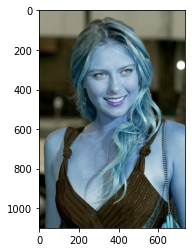

In [45]:
plt.imshow(img)

In [46]:
img

array([[[153, 155, 133],
        [153, 155, 133],
        [157, 154, 133],
        ...,
        [159, 155, 136],
        [160, 156, 137],
        [159, 155, 136]],

       [[152, 154, 132],
        [153, 155, 133],
        [157, 154, 133],
        ...,
        [160, 156, 137],
        [159, 155, 136],
        [158, 154, 135]],

       [[152, 154, 132],
        [153, 155, 133],
        [157, 154, 133],
        ...,
        [159, 156, 135],
        [159, 155, 136],
        [157, 153, 134]],

       ...,

       [[  0,   1,   2],
        [  0,   1,   2],
        [  0,   1,   2],
        ...,
        [ 73, 113, 148],
        [ 78, 119, 152],
        [ 82, 123, 156]],

       [[  0,   1,   2],
        [  0,   1,   2],
        [  0,   1,   2],
        ...,
        [ 76, 114, 149],
        [ 81, 119, 153],
        [ 85, 126, 159]],

       [[  0,   1,   2],
        [  0,   1,   2],
        [  0,   1,   2],
        ...,
        [ 75, 113, 148],
        [ 81, 119, 154],
        [ 88, 126, 161]]

In [47]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1099, 736)

In [48]:
gray

array([[148, 148, 148, ..., 150, 151, 150],
       [147, 148, 148, ..., 151, 150, 149],
       [147, 148, 148, ..., 150, 150, 148],
       ...,
       [  1,   1,   1, ..., 119, 124, 128],
       [  1,   1,   1, ..., 120, 125, 131],
       [  1,   1,   1, ..., 119, 125, 132]], dtype=uint8)

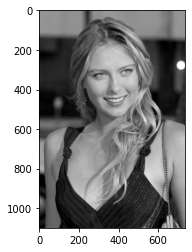

In [49]:
plt.imshow(gray, cmap='gray')

In [50]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[210, 190, 334, 334]])

In [51]:
(x,y,w,h) = faces[0]
x,y,w,h

(210, 190, 334, 334)

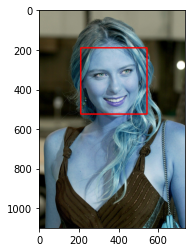

In [53]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),5)
plt.imshow(face_img)

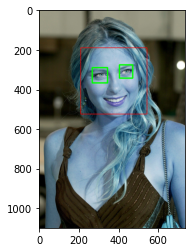

In [69]:

for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    cropped_gray = gray[y:y+h, x:x+w]
    cropped_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(cropped_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),5)
plt.figure()
plt.imshow(face_img, cmap='gray')

plt.show()

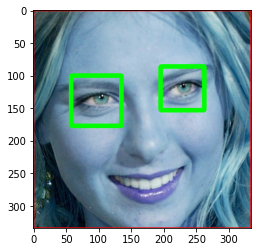

In [70]:
%matplotlib inline
plt.imshow(cropped_color, cmap='gray')

In [59]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

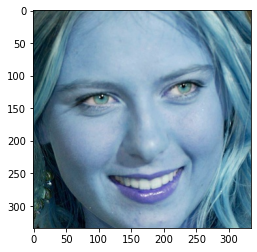

In [61]:
cropped_image = get_cropped_image_if_2_eyes('c:/Users/HI/Downloads/d90560477a89f8e9670a3a5e092ba8dd.jpg')
plt.imshow(cropped_image)

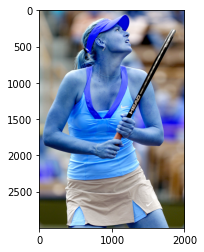

In [62]:
org_image_obstructed = cv2.imread('f:/machine_learning/py-master/DataScience/CelebrityFaceRecognition/images_dataset/maria_sharapova/3-681.jpg')
plt.imshow(org_image_obstructed)

In [63]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('f:/machine_learning/py-master/DataScience/CelebrityFaceRecognition/images_dataset/maria_sharapova/3-681.jpg')
cropped_image_no_2_eyes

In [64]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [86]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [87]:
img_dirs

['./dataset/cristiano_ronaldo',
 './dataset/cropped',
 './dataset/Kenvin_de_bruyne',
 './dataset/lionel_messi']

In [78]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [84]:
cropped_image_dirs = []
file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1   

cristiano_ronaldo
Kenvin_de_bruyne
Generating cropped images in folder:  ./dataset/cropped/Kenvin_de_bruyne
lionel_messi
Generating cropped images in folder:  ./dataset/cropped/lionel_messi
quang_hai
Generating cropped images in folder:  ./dataset/cropped/quang_hai


In [92]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

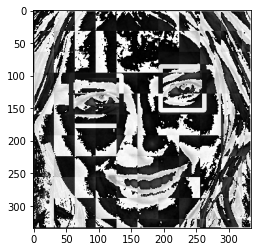

In [94]:
im_har = w2d(cropped_color,'db1',5)
plt.imshow(im_har, cmap='gray')

In [88]:
import os
cropped_image_dirs = []
for entry in os.scandir(path_to_cr_data):
    if entry.is_dir():
        cropped_image_dirs.append(entry.path)
cropped_image_dirs

['./dataset/cropped/cristiano_ronaldo',
 './dataset/cropped/Kenvin_de_bruyne',
 './dataset/cropped/lionel_messi']

In [89]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'cristiano_ronaldo': ['./dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo1.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo10.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo11.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo12.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo13.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo14.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo15.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo16.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo17.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo18.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo19.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo2.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo20.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo21.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo

In [90]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'cristiano_ronaldo': 0, 'Kenvin_de_bruyne': 1, 'lionel_messi': 2}

### Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

In [95]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) 

In [96]:
len(X)

119

In [97]:
len(y)

119

In [103]:
X[0]

array([ 28.,  37.,  46., ...,   0.,   0., 252.])

In [99]:
y[0]

0

**Convert list to array and reshape to 2D**

In [101]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(119, 4096)

### Data cleaning process is done. Now we are ready to train our model

### Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [133]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [134]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [135]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.808497,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.583660,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.819608,{'logisticregression__C': 1}


In [136]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=5))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

We will use SVM with rbf kernel tuned  with heuristic finetuning

In [104]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 5))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7666666666666667

In [109]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77        12
           1       0.88      0.70      0.78        10
           2       0.75      0.75      0.75         8

    accuracy                           0.77        30
   macro avg       0.78      0.76      0.77        30
weighted avg       0.78      0.77      0.77        30



In [115]:
logistic_regression_model = LogisticRegression(penalty='l2', C=1, solver='liblinear', max_iter=100)
logistic_regression_model.fit(X_train, y_train)
logistic_regression_model.score(X_test, y_test)

0.9

In [123]:
print(classification_report(y_test, logistic_regression_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.80      0.89        10
           2       0.88      0.88      0.88         8

    accuracy                           0.90        30
   macro avg       0.91      0.89      0.90        30
weighted avg       0.91      0.90      0.90        30



In [137]:
best_clf = best_estimators['logistic_regression']

Text(69.0, 0.5, 'Truth')

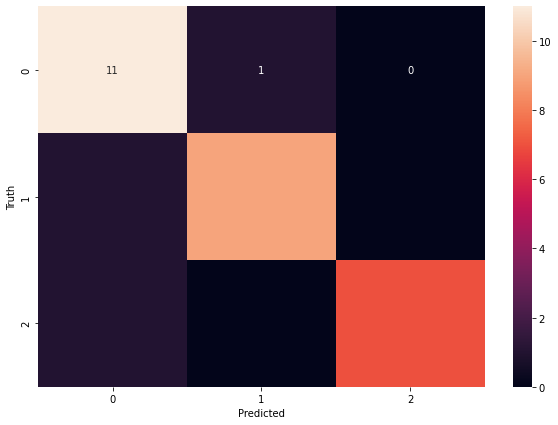

In [138]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm = confusion_matrix(y_test, best_clf.predict(X_test))
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Save the trained model

In [139]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'F:\\Project\\Deep_learning\\FaceRecognition\\model\\saved_model.pkl') 

['F:\\Project\\Deep_learning\\FaceRecognition\\model\\saved_model.pkl']

### Save class dictionary

In [141]:
import json
with open("F:\\Project\\Deep_learning\\FaceRecognition\\model\\class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))